In [22]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io

load dataset

In [3]:
raw = mne.io.read_raw_eeglab("eeg_data/eeglab_data.set")

<ipython-input-3-1ed232f4d6ab>:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab("eeg_data/eeglab_data.set")


In [4]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: EEG 000, EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, ...
 chs: 32 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 128.0 Hz
>

Effective window size : 16.000 (s)


<ipython-input-5-a5fcf744740b>:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


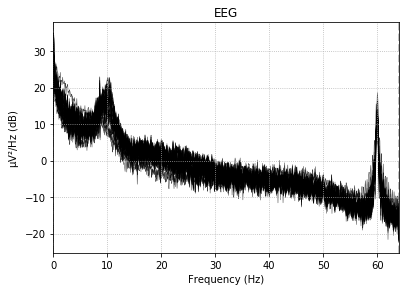

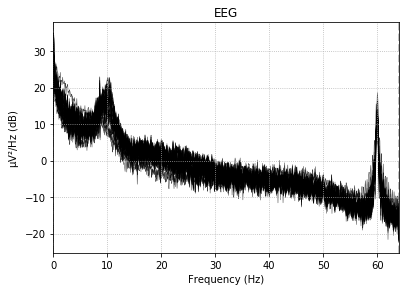

In [5]:
raw.plot_psd()

In [6]:
data, times = raw[:, :]  

In [7]:
data, times

(array([[-3.57974854e-05, -2.13263531e-05, -2.62817898e-05, ...,
          3.23337388e-06,  5.26735401e-06,  1.19898996e-05],
        [ 2.30784392e-06,  1.82337017e-05, -1.54759216e-06, ...,
          1.71533853e-07, -5.40794182e-06, -4.44116497e-06],
        [-2.67767258e-05, -5.17457438e-06, -1.64577427e-05, ...,
          3.73350067e-05,  3.53679810e-05,  4.78623352e-05],
        ...,
        [-1.50906496e-05, -2.31424665e-06, -6.38855410e-06, ...,
          7.32922125e-06,  3.90093350e-06,  1.25172253e-05],
        [-2.05280647e-05, -5.94961786e-06, -1.23311119e-05, ...,
          7.94211197e-06,  1.50376379e-06,  5.29875994e-06],
        [-9.50714016e-06,  7.33757973e-06,  1.53450775e-06, ...,
          1.77253227e-05,  9.55638695e-06,  1.28716125e-05]]),
 array([0.00000000e+00, 7.81250000e-03, 1.56250000e-02, ...,
        2.38289062e+02, 2.38296875e+02, 2.38304688e+02]))

In [8]:
len(data[0])

30504

In [9]:
len(times)

30504

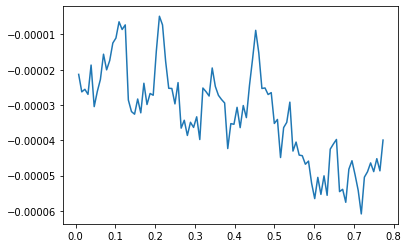

In [10]:
plt.plot(times[1:100], data[0][1:100])

In [16]:
# to pandas
df_data = pd.DataFrame(data)
df_times = pd.DataFrame(times)

In [17]:
df_data.head()

,0,1,2,3,4,5,6,7,8,9,...,30494,30495,30496,30497,30498,30499,30500,30501,30502,30503
0,-0.000036,-0.000021,-0.000026,-0.000026,-0.000027,-0.000019,-0.000030,-0.000026,-0.000023,-0.000016,...,-1.021861e-05,-0.000004,-0.000016,-0.000012,-0.000021,-0.000015,-0.000008,3.233374e-06,0.000005,0.000012
1,0.000002,0.000018,-0.000002,0.000010,0.000008,0.000018,0.000003,0.000008,0.000006,0.000012,...,-1.585967e-05,-0.000010,-0.000011,-0.000010,-0.000021,-0.000012,-0.000010,1.715339e-07,-0.000005,-0.000004
2,-0.000027,-0.000005,-0.000016,-0.000013,-0.000014,-0.000012,-0.000025,-0.000021,-0.000024,-0.000017,...,1.384768e-05,0.000020,0.000013,0.000017,0.000011,0.000022,0.000028,3.733501e-05,0.000035,0.000048
3,-0.000031,-0.000011,-0.000023,-0.000018,-0.000015,-0.000016,-0.000029,-0.000025,-0.000028,-0.000018,...,-5.360739e-06,-0.000003,-0.000015,-0.000011,-0.000014,0.000002,0.000009,1.564260e-05,0.000010,0.000019
4,-0.000032,-0.000018,-0.000025,-0.000026,-0.000018,-0.000023,-0.000028,-0.000030,-0.000032,-0.000026,...,2.257567e-07,-0.000002,-0.000004,-0.000005,-0.000004,0.000010,0.000015,2.417057e-05,0.000012,0.000015


In [19]:
df_times.head()

,0
0,0.000000
1,0.007812
2,0.015625
3,0.023438
4,0.031250


In [27]:
# save to mat
scipy.io.savemat('eeg_data/processed_data.mat', mdict={'data':data})
scipy.io.savemat('eeg_data/processed_times.mat', mdict={'times':times})